## Radar Raingage Intercomparisons

In [ ]:
%matplotlib inline
from rain import *
from common import *

**Philadelphia: **

In [ ]:
path = "C:/Users/Julia/Google Drive/PHILADELPHIA/"

rg = RainGage(path=path, df_file="Philadelphia_raingage_1996_2015_NAN_filled_time_indexed.dat")
rad = RainGage(path=path, name="Phila_gage_{YEAR}_fill.dat", year=range(2003,2015))

**St. Louis: **

In [ ]:
path = 'C:/Users/Julia/Google Drive/STLOUIS/'

rg = Rain(path=path, name='StLouis_gage_{YEAR}_UTC_reordered.dat', year=range(2009, 2015), ngages=101, units='in')
rad = Rain(path=path, name='StLouis_radar_{YEAR}_UTC_reordered.dat', year=range(2009, 2015), ngages=101, units='mm')
rg.ll_file = 'll_loc{YEAR}.txt'.format(YEAR=rg.year)

In [ ]:
rg.get_ll(cols=['lat','lon'])
rad.ll = rg.ll

### Let's Explore!

In [ ]:
p = RadarGage(gage=rg, radar=rad)
p.save_path = './output/StLouis/'

In [ ]:
p.plot_correlation(time_step='24H', base=12)

In [ ]:
m = min(p.rate.mean(axis=2).max())
p.rate.mean(axis=2).plot(kind='scatter', x='gage', y='radar', figsize=(8,8), xlim=(0, m), ylim=(0, m))
plt.show()

In [ ]:
p.plot_rate(interval='seasonal', gage=True, m=7, h=5)

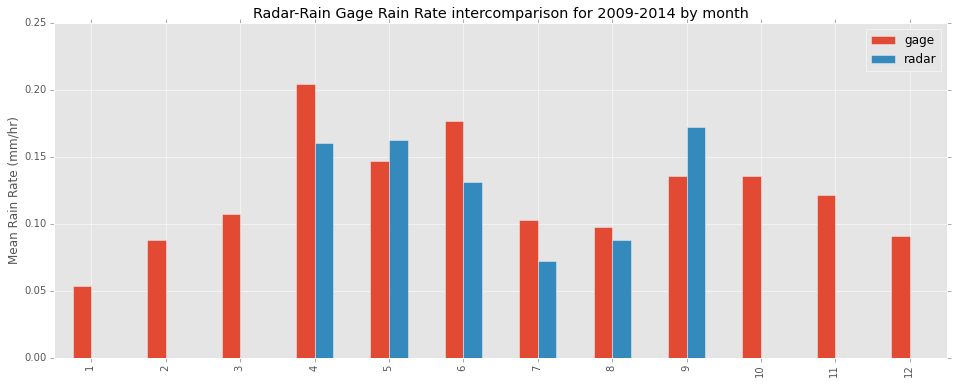

In [11]:
title = 'Radar-Rain Gage Rain Rate intercomparison for {YEAR} by month'.format(YEAR=p.year)

df = p.rate.groupby(p.rate.axes[1].month).mean().mean(axis=2)
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Mean Rain Rate (mm/hr)')
plt.title(title)
plt.savefig(p.save_path+title+'.jpg')
plt.show()

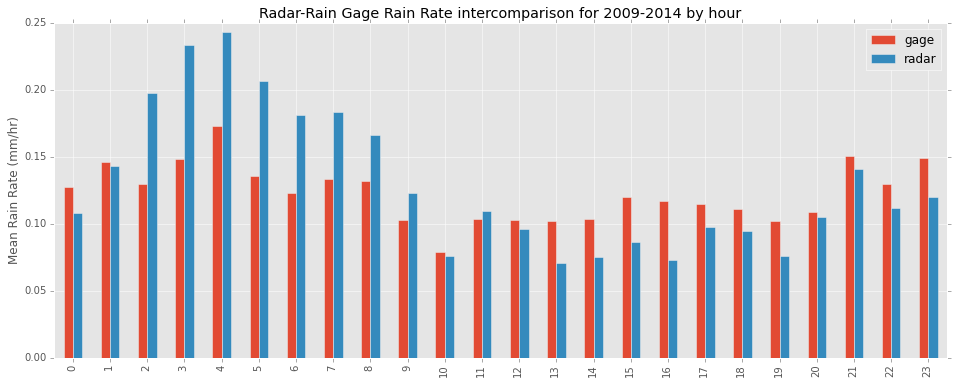

In [21]:
title = 'Radar-Rain Gage Rain Rate intercomparison for {YEAR} by hour'.format(YEAR=p.year)

df = p.rate.groupby(p.rate.axes[1].hour).mean().mean(axis=2)
df.plot(kind='bar', figsize=(16,6))
plt.ylabel('Mean Rain Rate (mm/hr)')
plt.title(title)
plt.savefig(p.save_path+title+'.jpg')
plt.show()

Choose you threshold carefully. You will notice that it makes a big difference in the results

In [24]:
p.per_hour = rg.per_hour
p.get_wet()

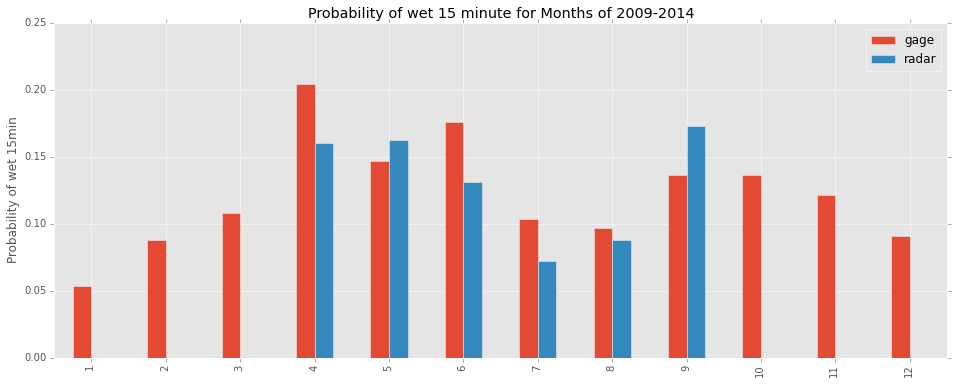

In [25]:
p.plot_prob_wet()

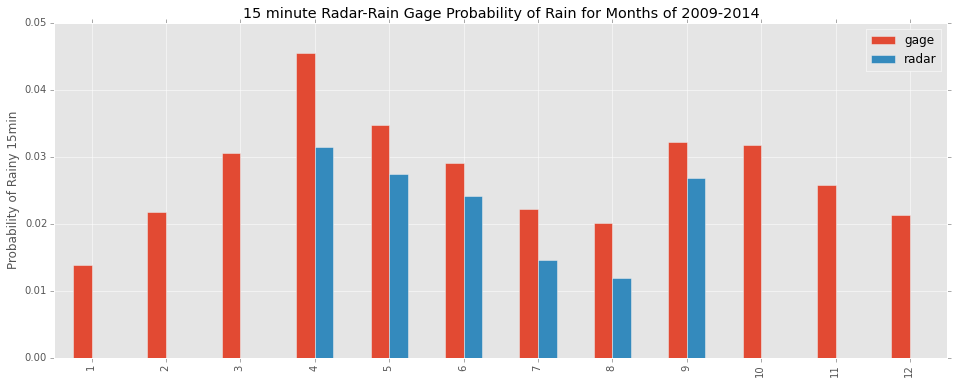

In [26]:
title = create_title('{ts} Radar-Rain Gage Probability of Rain', p.year, time_step=p.freq, interval='seasonal')

p.wet = p.rate.mean(axis=2) >= p.thresh*rg.per_hour
p.wet.groupby(p.wet.index.month).mean().plot(kind='bar', figsize=(16,6))
plt.ylabel('Probability of Rainy 15min')
plt.title(title)
plt.savefig(p.save_path+title+'.jpg')
plt.show()

### Plot the rainfall in space using shaded points

In [27]:
p.ll_file = 'll_loc{YEAR}.txt'.format(YEAR=2011)
p.get_ll(cols=['lat','lon'])

In [30]:
daily = p.rate.resample('24H', base=12, **get_resample_kwargs(p.rate))
day = p.ll.join(daily.to_frame().loc['2011-06-26 12:00:00'])
day = day[day.lat != 0]

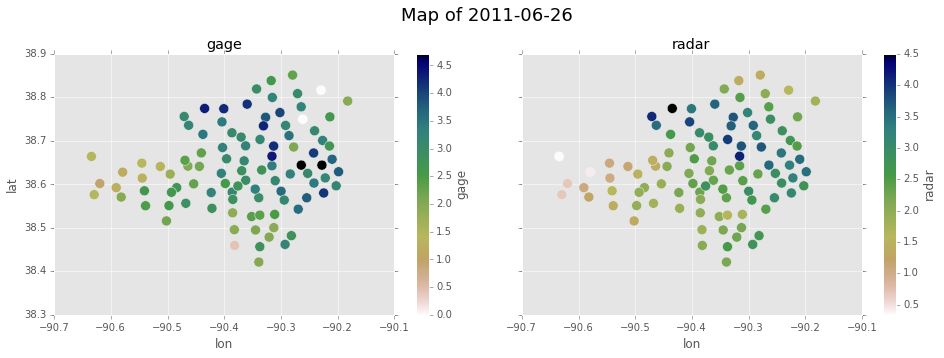

In [31]:
map_rain(day, p.save_path, 'Map of 2011-06-26')